
# **Prompting LLMs with LangChain: Best Practices and Techniques**

## **Introduction**  
Large Language Models (LLMs) respond based on the prompts they receive – in other words, *better prompts yield better outputs*.  
Prompt engineering is the art of crafting these inputs to guide the model effectively.  

**In this notebook, you will learn:**  
- What is a prompt and why it matters  
- How to use LangChain's `PromptTemplate` and `ChatPromptTemplate`  
- Best practices for crafting good prompts  
- How to use **few-shot prompting** for better results  
- Advanced techniques such as **dynamic example selection, chain-of-thought prompting, and role-playing**  
- Hands-on exercises to reinforce your learning  

By the end, you'll be able to craft effective prompts that improve LLM responses and integrate them into applications using LangChain.


**What is prompt?**

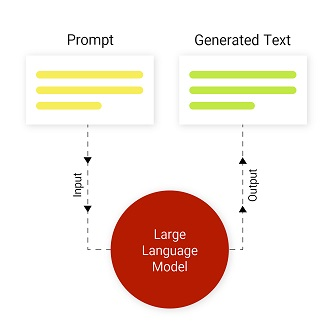

**why is it so important?**


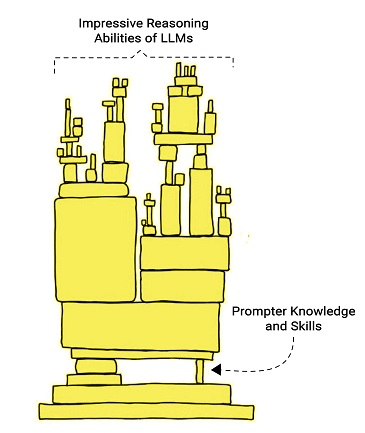

**how can we write better prompts?**


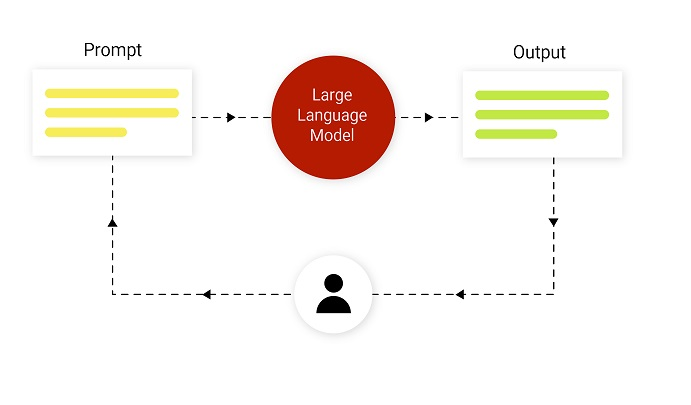


## **Core Concepts**  

### **1. Structure of a Good Prompt**  
A well-structured prompt typically includes:  
1. **Instructions** - Clearly tell the model what to do.  
2. **Context** - Provide relevant information to guide the response.  
3. **User Query** - The actual request or question from the user.  
4. **Output Indicator** - Hints that guide the model’s answer format.  

Example of a **bad prompt**:  
```plaintext
Translate this sentence.
```
Example of a **good prompt**:  
```plaintext
Translate the following sentence from English to Spanish:  
Sentence: "Hello, how are you?"  
Translation:
```


**which providers are integrated to LangChain?**



> [**available llms**](https://integrations.langchain.com/)



**We need api key to get access to models**


> [**access to Google PaLM**](https://developers.generativeai.google/tutorials/setup)

> [**access to Cohere**](https://dashboard.cohere.com/)







**Let s dive into code**


**install some neccessary packages**

In [ ]:
!pip install -q  langchain-openai langchain_community tiktoken langchain
# !pip install -q  langchain-cohere
%pip install -qU langchain-google-genai



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.4 MB/s eta 0:00:00


In [ ]:
import os
import getpass
if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key securely:")


Enter your OpenAI API key securely:··········


In [ ]:
import os
from google.colab import userdata
if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] =  userdata.get('openai_api_key')

In [ ]:
from langchain_openai import ChatOpenAI

MODEL_NAME = "gpt-4o-mini"  # Ensure you use a valid OpenAI model name
llm = ChatOpenAI(model_name=MODEL_NAME, temperature=0, max_tokens=512)

print(f"Using model: {llm.model_name}")



OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [ ]:
from google.colab import userdata
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] =  userdata.get('GOOGLE_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-exp",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)


**The input/output for LLMs is simple and easy to understand - a string**

In [ ]:
llm.invoke('who is the president of Iran in 2025?')

AIMessage(content="I don't have access to real-time information or events that occur after October 2023, so I cannot provide the name of the president of Iran in 2025. For the most current information, I recommend checking reliable news sources or official government announcements.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 18, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-698fac42-8b5b-4594-a2fe-1f63e6950130-0', usage_metadata={'input_tokens': 18, 'output_tokens': 52, 'total_tokens': 70, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:

llm.invoke("what is the biggest number that have been calculated through now ??")



AIMessage(content="As of my last knowledge update in October 2023, the largest known prime number is \\(2^{82,589,933} - 1\\). This number was discovered on December 7, 2018, as part of the Great Internet Mersenne Prime Search (GIMPS) project. It has 24,862,048 digits.\n\nHowever, if you're asking about the largest number in a more general sense (not limited to prime numbers), mathematicians can define extremely large numbers using various notations, such as Graham's number, which is so large that it cannot be fully expressed in conventional notation or even in terms of powers of 10.\n\nIf you're interested in a specific context or type of number, please let me know!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 153, 'prompt_tokens': 19, 'total_tokens': 172, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0

In [ ]:
llm.invoke('tell me about Amir Kabir')

AIMessage(content="Amir Kabir, also known as Mirza Taghi Khan Farahani, was a prominent Iranian statesman and reformer during the Qajar dynasty in the 19th century. He was born in 1807 and served as the Prime Minister of Iran from 1848 until his assassination in 1851. Amir Kabir is best known for his efforts to modernize Iran and implement various reforms aimed at strengthening the central government and improving the country's infrastructure.\n\nSome of his key contributions include:\n\n1. **Educational Reforms**: Amir Kabir established the Dar al-Funun (House of Knowledge) in 1851, which was one of the first modern universities in Iran. This institution aimed to educate a new generation of professionals in various fields, including science, engineering, and medicine.\n\n2. **Administrative Reforms**: He worked to reduce corruption within the government and improve the efficiency of the administration. He sought to centralize power and diminish the influence of local chieftains and ar

In [ ]:
llm.invoke('tell me about Amir Kabir. Provide key dates and events and describe his most imporatnt achievement')

AIMessage(content="Amir Kabir, also known as Mirza Taghi Khan Farahani, was a prominent Iranian statesman and reformer during the Qajar dynasty. He is best known for his efforts to modernize Iran in the mid-19th century. Here are some key dates and events related to his life and career:\n\n### Key Dates and Events:\n\n- **1807**: Amir Kabir was born in the village of Farahan, near Arak, Iran.\n- **1830s**: He began his career in the Qajar court, gradually rising through the ranks due to his administrative skills and loyalty.\n- **1848**: He was appointed as the Prime Minister (Grand Vizier) of Iran by Naser al-Din Shah, the Qajar king.\n- **1851**: Amir Kabir initiated a series of reforms aimed at modernizing Iran, including educational, economic, and military reforms.\n- **1852**: His reforms faced significant opposition from conservative factions within the court and religious leaders. He was dismissed from his position as Prime Minister.\n- **1852**: After his dismissal, Amir Kabir 

In [ ]:

llm.invoke('tell me about Amir Kabir. Provide 3 bullet points his most imporatnt achievement. your output must to be less than 100 words')

AIMessage(content='Amir Kabir, a prominent Iranian statesman in the 19th century, is best known for his significant contributions to modernizing Iran. \n\n- **Educational Reforms**: He established modern schools and universities, promoting science and technology.\n- **Economic Development**: He initiated infrastructure projects, including roads and telegraph lines, enhancing trade and communication.\n- **Administrative Reforms**: Kabir implemented reforms to reduce corruption and improve governance, strengthening the central authority of the Qajar dynasty. \n\nHis efforts laid the groundwork for future modernization in Iran.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 113, 'prompt_tokens': 36, 'total_tokens': 149, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-

# **Real-World Examples of Improving Prompts**
These examples show how refining prompts **improves AI responses**, making them **more precise, structured, and useful**.

---

## **1️⃣ Customer Support Chatbot (Improving User Queries)**

💡 _Scenario:_ A company uses an AI chatbot to handle customer inquiries.

| **Prompt Version** | **Explanation** |
|-------------------|----------------|
| 🟥 **Bad Prompt**: `"Help me with my order."` | Too vague; the AI lacks context. |
| 🟨 **Better Prompt**: `"Help me track my order. My order ID is 12345."` | Adds details, but still lacks expected response format. |
| 🟩 **Best Prompt**: `"Help me track my order #12345. Provide the latest status and estimated delivery date in a concise response (max 50 words)."` | Structured, specific, and enforces brevity. |

👉 **Improvement:** AI moves from **unclear** to **structured and useful responses**.

---

## **2️⃣ Data Analysis Report (Enhancing Query Precision)**

💡 _Scenario:_ A data analyst asks an AI assistant for sales insights.

| **Prompt Version** | **Explanation** |
|-------------------|----------------|
| 🟥 **Bad Prompt**: `"Show me sales data."` | Too broad; AI doesn't know what aspect of sales to focus on. |
| 🟨 **Better Prompt**: `"Show me sales data for Q1 2023 by region."` | Provides a timeframe and segmentation but lacks clarity on output format. |
| 🟩 **Best Prompt**: `"Generate a summary of Q1 2023 sales performance by region. Provide total revenue and percentage growth compared to Q4 2022 in a 3-bullet point summary."` | Well-structured, defines **timeframe, metric, comparison, and output format**. |

👉 **Improvement:** AI moves from **overly broad data dumps** to **precise, actionable insights**.

---

## **3️⃣ Medical Assistant AI (Refining Health Advice Requests)**

💡 _Scenario:_ A patient asks a **medical AI assistant** about symptoms.

| **Prompt Version** | **Explanation** |
|-------------------|----------------|
| 🟥 **Bad Prompt**: `"Tell me about headaches."` | Too general; AI doesn't know the user's situation. |
| 🟨 **Better Prompt**: `"I have a headache. What could be the causes?"` | More specific, but still lacks key factors like duration and severity. |
| 🟩 **Best Prompt**: `"I have had a headache for 3 days, mostly on the left side. It worsens with bright lights. What could be the possible causes, and when should I see a doctor?"` | Adds **symptom details, duration, triggers, and urgency check**. |

👉 **Improvement:** AI moves from **generic medical info** to **context-aware guidance**.

---

## **4️⃣ AI-Powered Resume Review (Optimizing Career Advice)**

💡 _Scenario:_ A job seeker asks an **AI career assistant** for feedback.

| **Prompt Version** | **Explanation** |
|-------------------|----------------|
| 🟥 **Bad Prompt**: `"Review my resume."` | AI doesn't know what aspect to focus on. |
| 🟨 **Better Prompt**: `"Review my resume for a software engineer job and suggest improvements."` | Adds a job title but lacks specifics on improvement areas. |
| 🟩 **Best Prompt**:  


## **AI-Powered Resume Review (Optimizing Career Advice)**

💡 **Scenario:** A job seeker asks an **AI career assistant** for feedback.

### **Prompt Evolution**
This example demonstrates how refining prompts **leads to better AI-generated resume feedback**.

| **Prompt Version** | **Explanation** |
|-------------------|----------------|
| 🟥 **Bad Prompt**: `"Review my resume."` | AI doesn't know what aspect to focus on. |
| 🟨 **Better Prompt**: `"Review my resume for a software engineer job and suggest improvements."` | Adds a job title but lacks specifics on improvement areas. |
| 🟩 **Best Prompt**: `Review my resume for a software engineering position.Identify weaknesses in technical skills, formatting, and clarity. Provide 3 key improvements in a short bullet point list.` | **Focuses the AI on actionable insights** and enforces **structured output**. |

### **Why This Works**
✅ **Vague prompts lead to poor results** 🟥  
✅ **Adding details improves output relevance** 🟨  
✅ **Structuring requests ensures clarity & usefulness** 🟩  

### **Now, Let's See It in Action!**
Run the code below to see how the **AI’s response improves** when we refine our prompts.


By using prompt templates, developers and researchers can create **well-structured**, **customizable**, and **reusable** prompts that enhance the effectiveness and efficiency of language models

In [ ]:
template="""Review my resume for a {job_title} position.
Identify weaknesses in technical skills, formatting, and clarity.
Provide 3 key improvements in a short bullet point list."""

In [ ]:
from langchain.prompts import PromptTemplate

In [ ]:

template = """Translate the following word from {input_language} to {output_language}.
Word: {word}
Translation:"""
prompt = PromptTemplate(template=template, input_variables=["input_language", "output_language", "word"])


In [ ]:
prompt_1 = prompt.format(input_language ='English', output_language='Farsi', word='house')
prompt_1

'Translate the following word from English to Farsi.\nWord: house\nTranslation:'

In [ ]:

llm.invoke(prompt_1)

AIMessage(content='Translation: خانه', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 4, 'prompt_tokens': 23, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-7514743b-2a4a-42d1-86ee-a5e0b8813214-0', usage_metadata={'input_tokens': 23, 'output_tokens': 4, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
text_to_be_summerized = """We’re introducing a new Model Distillation offering to provide developers with an integrated workflow to manage the entire distillation pipeline directly within the OpenAI platform. This lets developers easily use the outputs of frontier models like o1-preview and GPT-4o to fine-tune and improve the performance of more cost-efficient models like GPT-4o mini.

Model distillation involves fine-tuning smaller, cost-efficient models using outputs from more capable models, allowing them to match the performance of advanced models on specific tasks at a much lower cost. Until now, distillation has been a multi-step, error-prone process, which required developers to manually orchestrate multiple operations across disconnected tools, from generating datasets to fine-tuning models and measuring performance improvements. Since distillation is inherently iterative, developers needed to repeatedly run each step, adding significant effort and complexity.

Our new Model Distillation suite includes:

Stored Completions(opens in a new window): Developers can now easily generate datasets for distillation by automatically capturing and storing the input-output pairs generated by one of our models, like GPT-4o or o1-preview through our API. With Stored Completions, you can easily build datasets with your production data to evaluate and fine-tune models. Developers can review this integration guide(opens in a new window) to learn how to opt-in to storing completions.

Evals(opens in a new window) (beta): Developers can now create and run custom evaluations on our platform to measure model performance on specific tasks. Instead of manually creating evaluation scripts and integrating disparate logging tools, Evals provides an integrated way to measure model performance. You can either use data from Stored Completions or upload existing datasets to set up your evaluations. Evals can also be used independently of fine-tuning to quantitatively evaluate model performance for your use cases.

Fine-tuning(opens in a new window): Stored Completions and Evals are fully integrated with our existing fine-tuning offering. This means that developers can use datasets created with Stored Completions in their fine-tuning jobs and run evaluations on fine-tuned models using Evals, all within our platform."""

In [ ]:
template = """
summerize the following text in {number_of_line} lines with tone of {tone}
text is: {text}"""
prompt = PromptTemplate(template=template, input_variables=["number_of_line", 'text', 'tone'])
prompt.format(number_of_line=3, text=text_to_be_summerized, tone='formal')

'\nsummerize the following text in 3 lines with tone of formal\ntext is: We’re introducing a new Model Distillation offering to provide developers with an integrated workflow to manage the entire distillation pipeline directly within the OpenAI platform. This lets developers easily use the outputs of frontier models like o1-preview and GPT-4o to fine-tune and improve the performance of more cost-efficient models like GPT-4o mini.\n\nModel distillation involves fine-tuning smaller, cost-efficient models using outputs from more capable models, allowing them to match the performance of advanced models on specific tasks at a much lower cost. Until now, distillation has been a multi-step, error-prone process, which required developers to manually orchestrate multiple operations across disconnected tools, from generating datasets to fine-tuning models and measuring performance improvements. Since distillation is inherently iterative, developers needed to repeatedly run each step, adding sign

In [ ]:
template = """
You are proficient in {language}, and I would like you to provide a brief definition and two examples
for each vocabulary word. Please keep in mind that I am at  {level} level in {language}, so provide two sets
of examples for the given input: the first set with easy examples and the second with more advanced ones.
Input: {input}
Here you go:
"""


In [ ]:

prompt = PromptTemplate.from_template(template)
prompt_language = prompt.format(language='English', level='B2', input='ambitious') #obligation, voluntarily
prompt_language

'\nYou are proficient in English, and I would like you to provide a brief definition and two examples\nfor each vocabulary word. Please keep in mind that I am at a B2 level in English, so provide two sets\nof examples for the given input: the first set with easy examples and the second with more advanced ones.\nInput: ambitious\nHere you go:\n'

In [ ]:
llm.invoke(prompt_language).content

'**Definition:**\nAmbitious (adjective) - having a strong desire and determination to succeed or achieve something, often requiring hard work and effort.\n\n**Set 1: Easy Examples**\n1. Maria is very ambitious; she wants to become a doctor one day.\n2. The ambitious student studied late into the night to get good grades.\n\n**Set 2: Advanced Examples**\n1. His ambitious nature drove him to pursue a challenging career in international diplomacy, aiming to make a significant impact on global relations.\n2. The ambitious project sought to revolutionize renewable energy technology, attracting attention from investors and researchers alike.'

In [ ]:
llm.batch([prompt_language, prompt_1])

[AIMessage(content='**Definition of "ambitious":**  \nAmbitious refers to having a strong desire and determination to achieve success, power, or a particular goal.\n\n### Easy Examples:\n1. **She is very ambitious and wants to become a doctor one day.**\n2. **His ambitious plan to start a new business excited everyone.**\n\n### Advanced Examples:\n1. **Her ambitious nature drove her to pursue a challenging career in international diplomacy, aiming to make a significant impact on global relations.**\n2. **The ambitious project, which seeks to revolutionize renewable energy, has attracted considerable attention from investors and environmentalists alike.**', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 126, 'prompt_tokens': 82, 'total_tokens': 208, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tok

In [ ]:
for chunk in llm.stream("tell me about amirkabir. Provide 3 bullet points his most imporatnt achievement"):
    print(chunk, end="\n", flush=True)

content='' additional_kwargs={} response_metadata={} id='run-e4005266-9543-4759-9ec2-1a4901dca670'
content='Am' additional_kwargs={} response_metadata={} id='run-e4005266-9543-4759-9ec2-1a4901dca670'
content='irk' additional_kwargs={} response_metadata={} id='run-e4005266-9543-4759-9ec2-1a4901dca670'
content='ab' additional_kwargs={} response_metadata={} id='run-e4005266-9543-4759-9ec2-1a4901dca670'
content='ir' additional_kwargs={} response_metadata={} id='run-e4005266-9543-4759-9ec2-1a4901dca670'
content=',' additional_kwargs={} response_metadata={} id='run-e4005266-9543-4759-9ec2-1a4901dca670'
content=' also' additional_kwargs={} response_metadata={} id='run-e4005266-9543-4759-9ec2-1a4901dca670'
content=' known' additional_kwargs={} response_metadata={} id='run-e4005266-9543-4759-9ec2-1a4901dca670'
content=' as' additional_kwargs={} response_metadata={} id='run-e4005266-9543-4759-9ec2-1a4901dca670'
content=' Mir' additional_kwargs={} response_metadata={} id='run-e4005266-9543-4759-9

In [ ]:
template = """
You are knowledgeable in {field}. Please compare the following two concepts: {concept_1} and {concept_2}.

In your comparison, cover the following aspects:
- Definition and purpose
- Key similarities and differences
- Strengths and weaknesses
- Examples of practical use

Here you go:
"""


In [ ]:
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

# Initialize LLM (Ensure API key is set)
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

# Define the prompt template with dynamic variables
template = """
You are a creative expert in {field}. I need some ideas for {task}.

Please provide **three innovative ideas** to approach this task. For each idea, include:
- A brief description of the idea
- The expected impact or outcome
- Any potential challenges or risks

Here you go:
"""

# Initialize the PromptTemplate
prompt = PromptTemplate(input_variables=["field", "task", ], template=template)

field = "marketing"
task = "launching a new smart home device"

# Format the prompt with input variables
formatted_prompt = prompt.format(field=field, task=task)

# Display the formatted prompt
print(formatted_prompt)
ll.invoke(formatted_prompt)

ModuleNotFoundError: No module named 'langchain_openai'

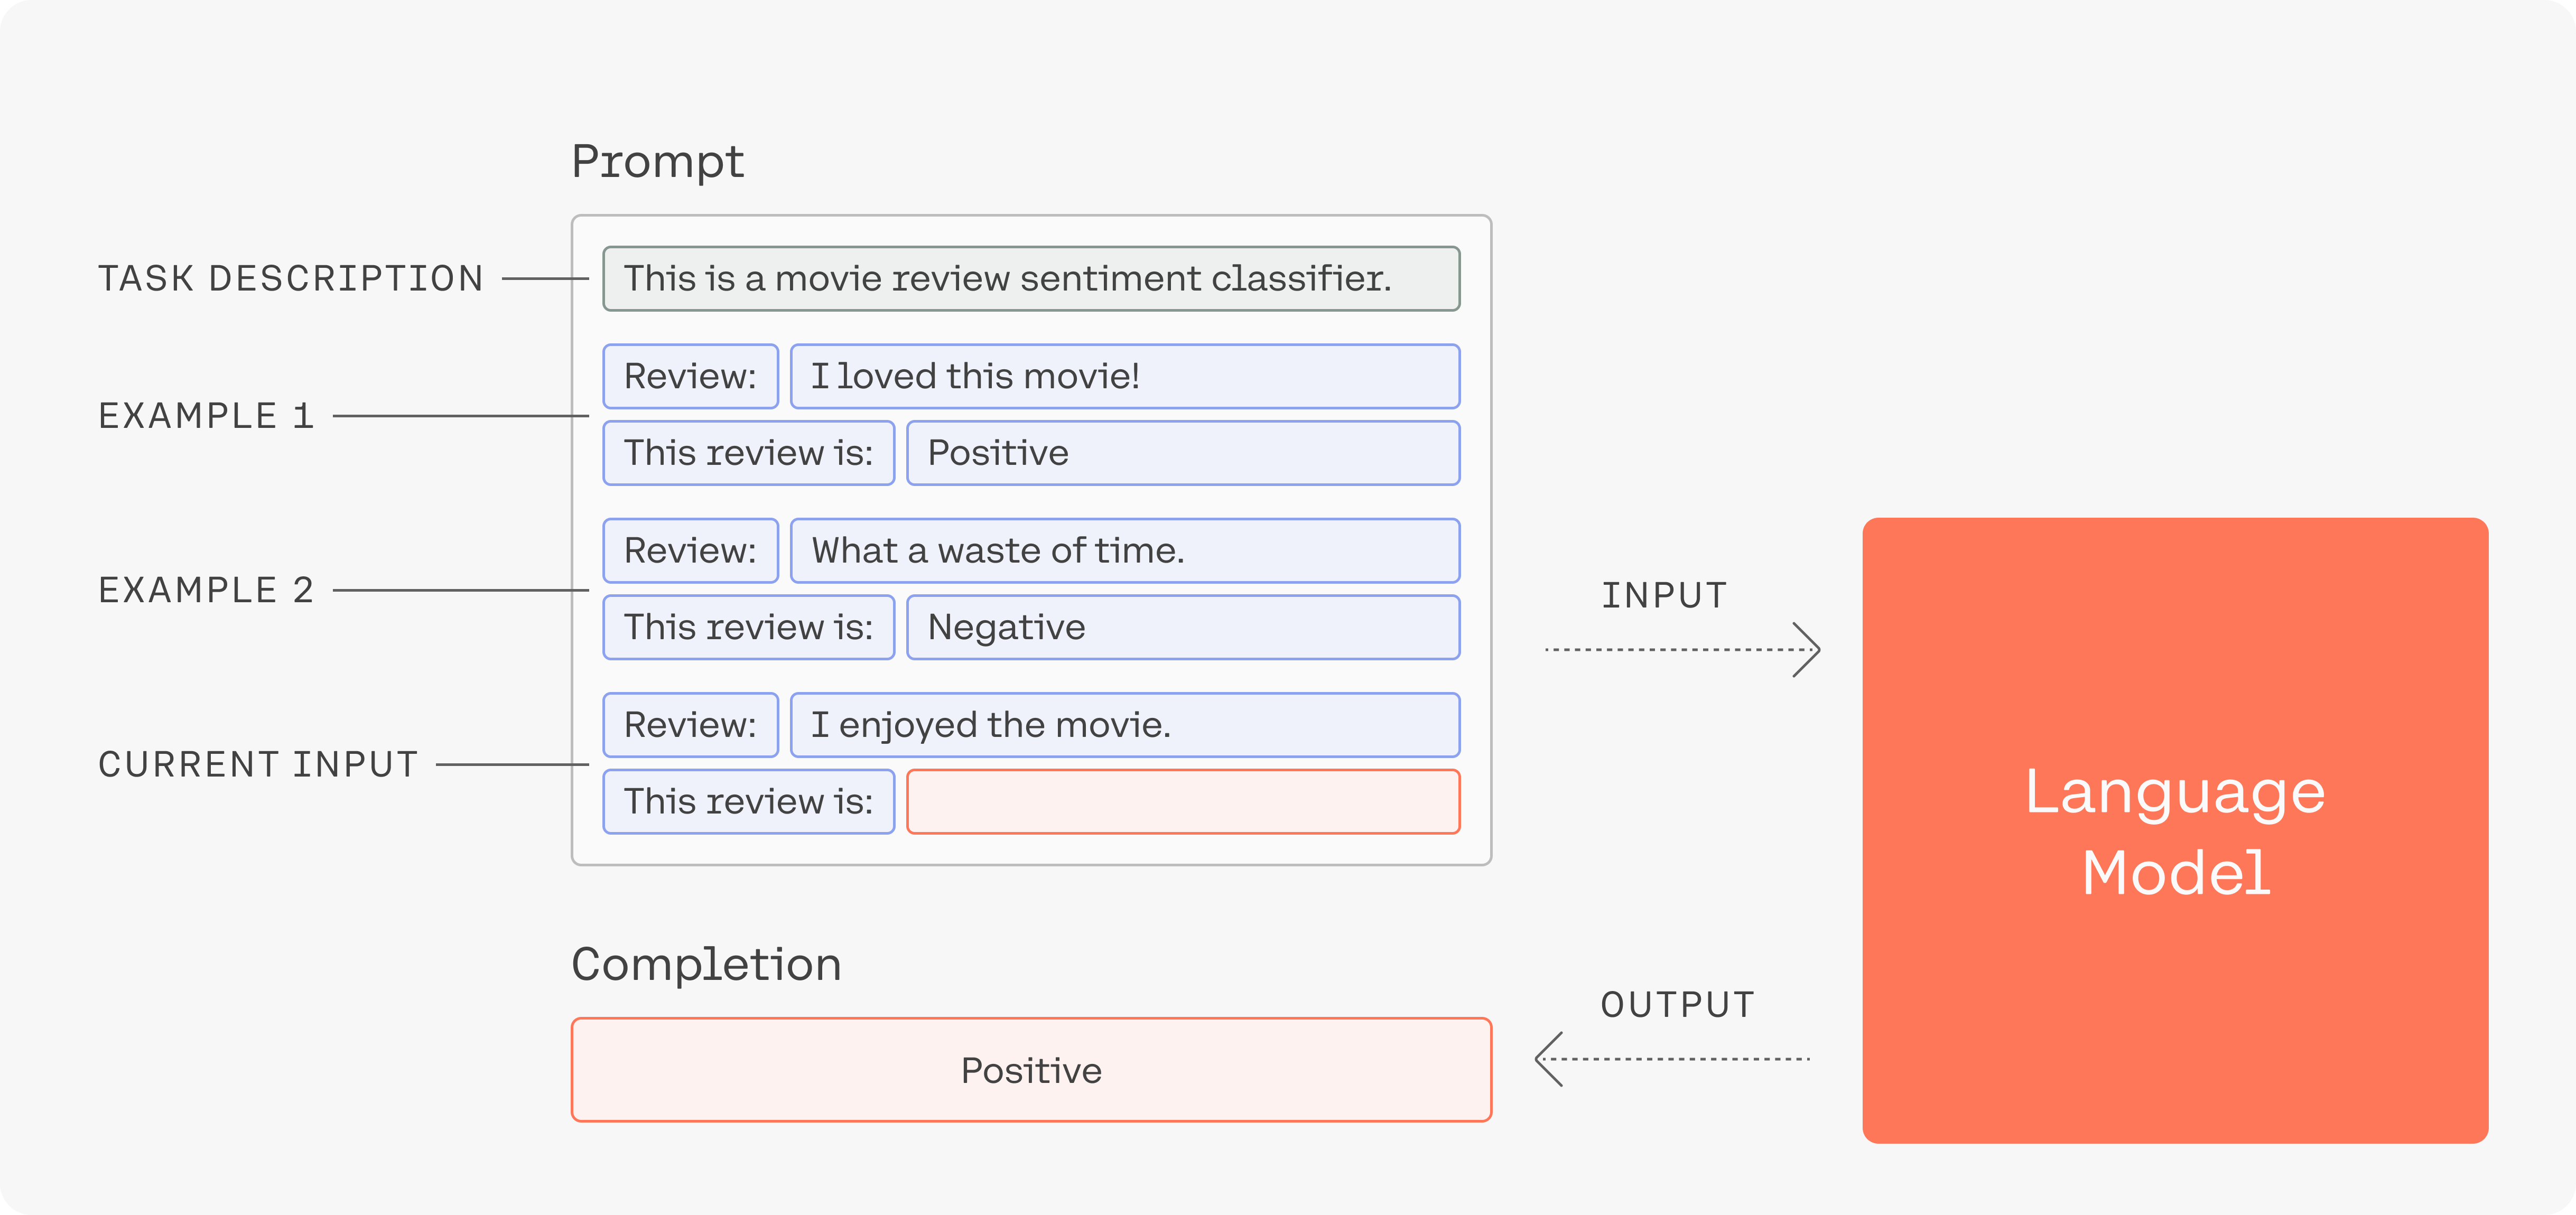

In [ ]:
from langchain_openai import OpenAI
llm = OpenAI( temperature=0)

In [ ]:
# template = """
# This is a movie review sentiment classifier.
# Review: "I loved this movie!" This review is positive.
# Review: "I don't know, it was ok I guess." This review is neutral.
# Review: "What a waste of time, would not recommend this movie." This review is negative.
# Review: "بدتر از این نمیشد" . this review is negative.
# input review:{review}"""
template = """
This is a movie review sentiment classifier.
Review: "I loved this movie!" This review is Positive.
Review: "I don't know, it was ok I guess." This review is neutral.
Review: "What a waste of time, would not recommend this movie." This review is negative.
Review: "بدتر از این نمیشد" . this review is negative.
Review:'اخ اخ منو برد به قدیما این فیلم ممنون از سایت خوبتون❤️' . this review is positive
Review:''بهترین فیلم دنیاست بنظرم',' . this review is positive
input review:{review}"""

In [ ]:
from langchain.prompts import PromptTemplate

In [ ]:
i = -1
reviews =['Game of Thrones finally finished, the last episode aptly titled\
 The Long Night and it was a terrible ending, disappointing for fans, causing a collective cringe around the globe.',
 'آخرش خیلی بد تموم شد' ,'اخ اخ منو برد به قدیما این فیلم ممنون از سایت خوبتون❤️' ,
 'هنوزم که هنوز فیلمی رو دستش نیومده' ,'بهترین فیلم دنیاست بنظرم', 'بد نبود']
prompt = PromptTemplate(input_variables=['review'], template=template)
formated_prompt = prompt.format(review= reviews[i])
print('review:', reviews[i])
print(llm.invoke(formated_prompt))

review: بد نبود

This review is neutral.


In [ ]:
llm.invoke(formated_prompt)

'\nThis review is neutral.'

In [ ]:
### topic modeling




template = """
What is the topic for a given news headline? \n
- business
- entertainment
- health
- sports
- politics
- mountains
- technology
choose one of the above mentioned topics

for example:
Text: Pixel 7 Pro Expert Hands On Review. \n
The answer is: technology \n

Text: Quit smoking? \n
The answer is: health \n
headline is: {headline}
"""
prompt = PromptTemplate.from_template(template)
headline = 'شخصیت رونالدو زیر ذره‌بین لوا: خشم درون دارد!'
# headline = 'کدام خودروهای داخلی گران شدند؟'
# headline = 'واکنش شدید ماسک به شکست ترامپ در انتخابات'
# headline = "برتری ۳ درصدی هریس بر ترامپ در یک نظرسنجی"
# headline = "کوه اورست همچنان در حال رشد و بلندتر شدن است!"
# headline = 'چرا کسی جلوی عرضه "ارابه‌های مرگ داخلی" را نمی‌گیرد؟'
formatted_prompt= prompt.format(headline=headline)
print(
    llm.invoke(formatted_prompt)
)



The answer is: sports


In [ ]:
llm.invoke(formatted_prompt)


''

In [ ]:
from langchain_community.callbacks import get_openai_callback
with get_openai_callback() as cb:
    result = llm.invoke(formatted_prompt)
    print(cb)

Tokens Used: 119
	Prompt Tokens: 112
		Prompt Tokens Cached: 0
	Completion Tokens: 7
		Reasoning Tokens: 0
Successful Requests: 1
Total Cost (USD): $0.000182


In [ ]:
messages_1 = [

     {'role':'user', 'content':'tell me a joke'},
     {'role':'assistant', 'content':'why did the chicken cross the road'},
      {'role':'user', 'content':'I do not know, why did the chicken cross the road'}

]

system_message = {'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'}


## **Chat Messages in LangChain**

In **LangChain**, the input for **Chat Models** is a list of **ChatMessages**, and the output is a single **ChatMessage**.

### **ChatMessage Components**
A **ChatMessage** has two required components:

- **content**: The content of the message.
- **role**: The role of the entity from which the ChatMessage originates.

### **Types of Chat Messages in LangChain**
LangChain provides several objects to easily distinguish between different roles:

- **HumanMessage**: A message from the human user.
- **AIMessage**: A message from the AI or assistant.
- **SystemMessage**: A message that sets the objectives or behavior guidelines for the AI.
- **FunctionMessage**: A message representing the result of a function call.
  - Includes a `name` parameter to specify the function's name.
- **ToolMessage**: A message representing the result of a tool call.
  - Includes a `tool_call_id` parameter to specify the tool call's ID.

These classes help structure interactions in chat-based applications, allowing for clear delineation of roles and facilitating complex workflows involving functions and tools.

For more details, refer to [LangChain's Message Types Documentation](https://python.langchain.com/v0.1/docs/modules/model_io/chat/message_types/).


In [ ]:

from langchain.schema import SystemMessage, HumanMessage, AIMessage
python_debugger = SystemMessage(content= 'You will be provided with a piece of Python code, and your task is to find and fix bugs in it.')
twitt_classifier = SystemMessage(content= 'You will be provided with a tweet, and your task is to classify its sentiment as positive, neutral, or negative.')
general_assistant = SystemMessage(content= 'you are a helpful assistant and you always answer questions honestly and concisely.')

In [ ]:
[SystemMessage(), HumanMessage(), AIMessage()]


[('system', 'You are a movie review sentiment classifier.'),
 ('human', 'Review: "I loved this movie!"'),
 ('ai', 'This review is positive()')]

In [ ]:
messages = [{'role':'user', 'content': 'ldf'},
            {'role':'assistant', 'content': 'ldf'},
            {'role':'system', 'content': 'ldf



]

In [ ]:
from langchain.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a movie review sentiment classifier. Classify the sentiment as Positive, Neutral, or Negative."),
    ("human", "Review: I loved this movie!"),
    ("ai", "This review is positive"),
    ("human", "Review: I don't know, it was ok I guess."),
    ("ai", "This review is neutral"),
    ("human", "Review: بدتر از این نمی شد"),
    ("ai", "this review is negative"),
    ("human", "{review}"),
    ('ai','?')
])
messages = prompt.format_messages(
    review=reviews[0]
)



In [ ]:
# from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI
chat_models = ChatOpenAI(model="gpt-4o-mini")
from langchain_openai import OpenAI
llm = OpenAI( temperature=0)

In [ ]:
chat_models.invoke(['who are you?']).content

"I am an AI language model created by OpenAI. I'm here to assist you by answering questions, providing information, and engaging in conversation on a wide range of topics. How can I help you today?"

In [ ]:
messages


[SystemMessage(content='You are a movie review sentiment classifier. Classify the sentiment as Positive, Neutral, or Negative.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Review: I loved this movie!', additional_kwargs={}, response_metadata={}),
 AIMessage(content='This review is positive', additional_kwargs={}, response_metadata={}),
 HumanMessage(content="Review: I don't know, it was ok I guess.", additional_kwargs={}, response_metadata={}),
 AIMessage(content='This review is neutral', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Review: بدتر از این نمی شد', additional_kwargs={}, response_metadata={}),
 AIMessage(content='this review is negative', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Game of Thrones finally finished, the last episode aptly titled The Long Night and it was a terrible ending, disappointing for fans, causing a collective cringe around the globe.', additional_kwargs={}, response_metadata={}),

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

template = ChatPromptTemplate([
    ("system", "You are a helpful AI bot."),

    ("placeholder", "{conversation}")
    # Equivalently:
    # MessagesPlaceholder(variable_name="conversation", optional=True)
])

prompt_value = template.invoke(
    {
        "conversation": [
            ("human", "Hi!"),
            ("ai", "How can I assist you today?"),
            ("human", "Can you make me an ice cream sundae?"),
            ("ai", "No.")
        ]
    }
)


In [ ]:
prompt_value

ChatPromptValue(messages=[SystemMessage(content='You are a helpful AI bot.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hi!', additional_kwargs={}, response_metadata={}), AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={}), HumanMessage(content='Can you make me an ice cream sundae?', additional_kwargs={}, response_metadata={}), AIMessage(content='No.', additional_kwargs={}, response_metadata={})])

In [ ]:
system_message_template = """
You are a helpful travel advisor chatbot.
Your objective is to assist users in planning their trips by providing personalized recommendations for attractions and activities based on their specified destination.
Be friendly, informative, and concise in your responses. Always tailor your recommendations to the destination provided by the user.
"""

prompt = ChatPromptTemplate([('system',  system_message_template),
                            ('human', 'my destination is {destination}')])
destination = 'Rome'
formatted_prompt = prompt.invoke({'destination': destination})
print(
    chat_models.invoke(formatted_prompt).content
)

Great choice! Rome is a city rich in history, culture, and exquisite food. Here are some must-see attractions and activities for your trip:

1. **Colosseum**: Explore this iconic symbol of Ancient Rome and learn about gladiatorial battles. Consider booking a guided tour to skip the lines and enhance your experience.

2. **Vatican City**: Visit St. Peter's Basilica and the Vatican Museums, home to the Sistine Chapel. Again, booking a timed entry ticket in advance can save you a lot of waiting time.

3. **Roman Forum and Palatine Hill**: Discover the heart of ancient Rome, where you can walk among the ruins and imagine life during the Roman Empire.

4. **Pantheon**: An architectural marvel, this temple-turned-church is one of the best-preserved ancient buildings in Rome.

5. **Trevi Fountain**: Toss a coin in the fountain to ensure your return to Rome. It’s especially beautiful at night when it's illuminated.

6. **Trastevere**: Stroll through this charming neighborhood, known for its na

In [ ]:
system_message_template = """
You are a travel advisor chatbot specializing in personalized trip recommendations.

### Instructions:
- Always provide **detailed** and **relevant** travel suggestions.
- Tailor responses based on the user's **destination** and **preferences**.
- Keep responses **concise yet informative**.
- Maintain a **friendly and professional tone**.
- If you don’t know an answer, say **'I'm not sure'** instead of guessing.

### Example Interaction:
**User:** "I'm traveling to Rome. What are some must-see attractions?"
**ai:** "Rome is rich in history! I recommend visiting the Colosseum, Vatican Museums, and the Pantheon. Would you like food recommendations as well?"
"""

In [ ]:
prompt = ChatPromptTemplate([('system',  system_message_template),
                            ('human', 'my destination is {destination}')])
destination = 'tokyo'
formatted_prompt = prompt.invoke({'destination': destination})
print(
    chat_models.invoke(formatted_prompt).content
)

Great choice! Tokyo is an exciting city filled with culture, technology, and delicious food. Here are some must-see attractions:

1. **Shinjuku Gyoen National Garden**: A beautiful oasis in the heart of the city, perfect for a leisurely stroll and cherry blossom viewing in spring.
  
2. **Sensō-ji Temple**: Tokyo's oldest temple located in Asakusa, surrounded by charming streets filled with shops and street food.
  
3. **Shibuya Crossing**: Experience the hustle and bustle at one of the world's busiest pedestrian crossings, and don’t forget to visit the Hachiko statue nearby!

4. **Tokyo Skytree**: For stunning panoramic views of the city, head to the observation decks of this iconic broadcasting tower.

5. **Akihabara**: A haven for tech and anime enthusiasts, it's filled with shops offering electronics, manga, and unique themed cafes.

Beyond attractions, are you interested in food recommendations, shopping, or cultural experiences? Let me know!


## **Chain of Thought (CoT) Prompting**

### **What is Chain of Thought (CoT)?**
Chain of Thought (CoT) prompting is a technique where an AI model is explicitly guided to **think step by step** before arriving at an answer. This **reduces errors**, especially in **math, logical reasoning, and multi-step problems**.

### **Why Does CoT Matter?**
🔹 Without CoT, AI **often guesses** instead of solving problems methodically.  
🔹 With CoT, AI **breaks down the reasoning process**, leading to **better accuracy**.  
🔹 CoT is **critical for complex tasks** like **math, logical puzzles, and decision-making**.

---

## **Comparing AI Responses: Without CoT vs. With CoT**
The following code defines two **LangChain prompt templates**:
1. **Without CoT** – The AI tries to **answer directly**, often leading to mistakes.
2. **With CoT** – The AI is **forced to explain its reasoning step by step**, improving accuracy.

We will apply these prompts to **two test problems**:
1. **Math word problem** (calculating chocolates left).
2. **Logical reasoning problem** (counting animal legs).

👉 **Run the code below to compare AI responses!**


In [ ]:
from langchain.prompts import PromptTemplate

# CoT-enabled prompt template
cot_prompt = PromptTemplate(
    input_variables=["problem"],
    template="""
Solve the following problem step by step:

Problem: {problem}

Let's think step by step.
"""
)

# Example without CoT (direct answer)
no_cot_prompt = PromptTemplate(
    input_variables=["problem"],
    template="""
Solve the following problem:

Problem: {problem}

Answer:
"""
)

# Example problems to test
math_problem = "John buys 3 boxes of chocolates. Each box contains 12 chocolates. He eats 5 chocolates. How many chocolates are left?"

logic_problem = "A farmer has 3 chickens, 2 cows, and 4 horses. How many legs are there in total?"

# Generate prompts
formatted_cot_prompt = cot_prompt.format(problem=math_problem)
formatted_no_cot_prompt = no_cot_prompt.format(problem=math_problem)

print("🔹 Without CoT Prompt:")
print(formatted_no_cot_prompt)
print("\n🔹 With CoT Prompt:")
print(formatted_cot_prompt)


🔹 Without CoT Prompt:

Solve the following problem:

Problem: John buys 3 boxes of chocolates. Each box contains 12 chocolates. He eats 5 chocolates. How many chocolates are left?

Answer:


🔹 With CoT Prompt:

Solve the following problem step by step:

Problem: John buys 3 boxes of chocolates. Each box contains 12 chocolates. He eats 5 chocolates. How many chocolates are left?

Let's think step by step.



## **3. Few-Shot Prompting**  
Few-shot prompting provides examples in the prompt to guide the model's response.


In [ ]:
from langchain.prompts import FewShotPromptTemplate, PromptTemplate

# Few-shot examples
examples = [
    {"question": "What is the capital of France?", "answer": "Paris"},
    {"question": "What is the largest planet?", "answer": "Jupiter"}
]

# Define prompt structure
example_prompt = PromptTemplate(input_variables=["question", "answer"],
                                template="""Q: {question} A: {answer}""")

# Create the FewShotPromptTemplate
few_shot_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix="Here are some examples of Q&A:",
    suffix="""Q: {new_question} \nA:""",
    input_variables=["new_question"]
)

# Format with a new question
formatted_few_shot_prompt = few_shot_prompt.format(new_question="Who wrote '1984'?")
print(formatted_few_shot_prompt)


Here are some examples of Q&A:

Q: What is the capital of France? A: Paris

Q: What is the largest planet? A: Jupiter

Q: Who wrote '1984'? 
A:
